(50, 0.96, 0.0001, [50, 48.0, 46.08, 44.236799999999995, 42.467327999999995, 40.76863487999999, 39.13788948479999, 37.57237390540799, 36.06947894919167, 34.626699791224, 33.24163179957504, 31.911966527592035, 30.635487866488354, 29.41006835182882, 28.233665617755666, 27.10431899304544, 26.02014623332362, 24.979340383990674, 23.980166768631047, 23.020960097885805, 22.100121693970372, 21.216116826211557, 20.367472153163096, 19.55277326703657, 18.77066233635511, 18.019835842900903, 17.299042409184867, 16.60708071281747, 15.942797484304771, 15.305085584932579, 14.692882161535275, 14.105166875073863, 13.540960200070908, 12.99932179206807, 12.479348920385346, 11.980174963569933, 11.500967965027135, 11.04092924642605, 10.599292076569007, 10.175320393506247, 9.768307577765997, 9.377575274655356, 9.002472263669143, 8.642373373122377, 8.296678438197482, 7.964811300669583, 7.646218848642799, 7.340370094697087, 7.046755290909203, 6.764885079272834, 6.49428967610192, 6.234518089057843, 5.9851373654

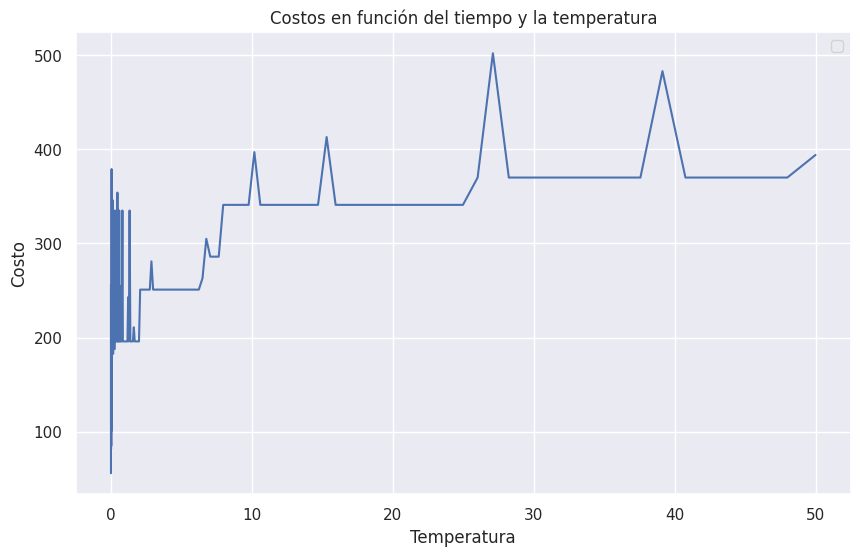

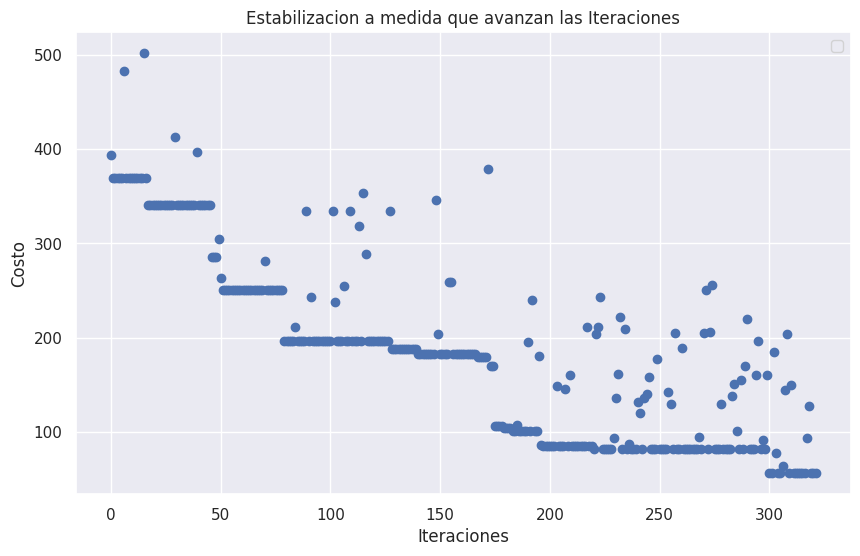

Mejor solución encontrada:
[28, 14, 14, 9, 0, 2, 8, 12, 4, 24, 4, 22, 6, 28, 11, 21, 25, 10, 0, 12, 26, 2, 0, 22, 12, 22, 16, 10, 3, 4, 22, 7, 24, 26, 8, 20, 20, 28, 24, 6, 16, 8, 8, 5, 6, 18, 26, 1, 8, 28]
Valor de la función objetivo:
56.0
Maquina 0: [4, 18, 22]
Maquina 1: [47]
Maquina 2: [5, 21]
Maquina 3: [28]
Maquina 4: [8, 10, 29]
Maquina 5: [43]
Maquina 6: [12, 39, 44]
Maquina 7: [31]
Maquina 8: [6, 34, 41, 42, 48]
Maquina 9: [3]
Maquina 10: [17, 27]
Maquina 11: [14]
Maquina 12: [7, 19, 24]
Maquina 13: []
Maquina 14: [1, 2]
Maquina 15: []
Maquina 16: [26, 40]
Maquina 17: []
Maquina 18: [45]
Maquina 19: []
Maquina 20: [35, 36]
Maquina 21: [15]
Maquina 22: [11, 23, 25, 30]
Maquina 23: []
Maquina 24: [9, 32, 38]
Maquina 25: [16]
Maquina 26: [20, 33, 46]
Maquina 27: []
Maquina 28: [0, 13, 37, 49]
Maquina 29: []


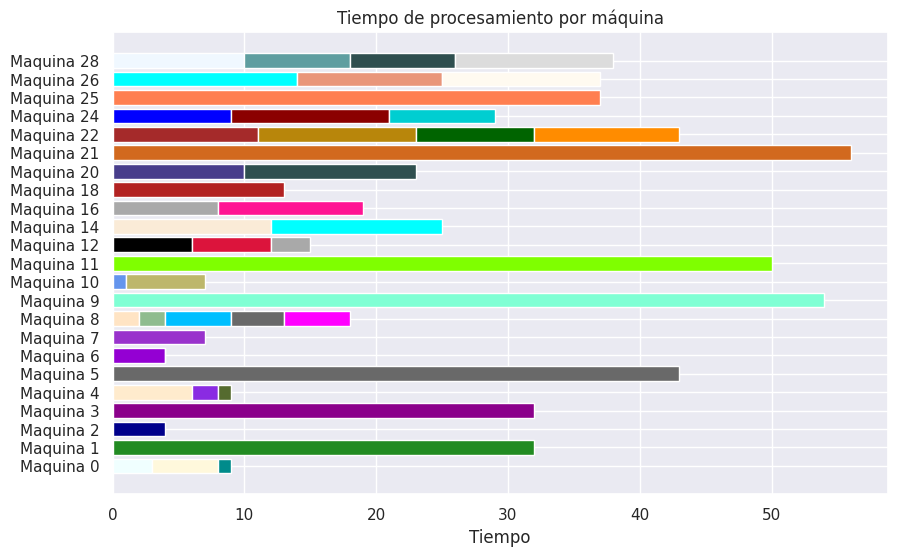

In [210]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns

def solucion_inicial(num_maq, num_order):
  # Asignamos cada orden a una máquina aleatoria
  solution = [random.randint(0, num_maq - 1) for i in range(num_order)]
  return solution

def funcion_objetivo(solution, tiempo_proceso):
  # Calculamos el tiempo total de cada máquina y retornamos el máximo
  total_time = [0]*num_maq
  for order, machine in enumerate(solution):
    total_time[machine] += tiempo_proceso[order][machine]
  return max(total_time)

def criterio(valor, nuevo_valor, T):

  if nuevo_valor <= valor:

    return True

  probabilidad = math.exp((valor - nuevo_valor) / T)


  return random.random() < probabilidad

def metaerustica(num_maq, num_order, tiempo, T_inicial, enfriamiento, T_final):
  #variables graficos
  T_array = []
  Costo_array = []

  #variables meta
  solucion_actual = solucion_inicial(num_maq, num_order)
  valor = funcion_objetivo(solucion_actual, tiempo)
  mejor_solucion = solucion_actual.copy()
  mejor_valor = valor
  T = T_inicial

  i = 1
  while(T > T_final):
    nueva_solucion = solucion_actual.copy()
    # Elegimos una tarea y la movemos a una máquina diferente
    task = random.randint(0, num_order - 1)
    nueva_solucion[task] = random.randint(0, num_maq - 1)
    nuevo_valor = funcion_objetivo(nueva_solucion, tiempo)

    if criterio(valor, nuevo_valor, T):
      solucion_actual = nueva_solucion
      valor = nuevo_valor

    if nuevo_valor < mejor_valor:
      mejor_solucion = nueva_solucion.copy()
      mejor_valor = nuevo_valor

    #estado de la metaheuristica
    i = i + 1
    T_array.append(T)
    Costo_array.append(nuevo_valor)
    T *= enfriamiento

  return mejor_solucion, mejor_valor, T_array, Costo_array


M_prod = np.loadtxt('dmu73.txt')

#Parametros metaheuristica
num_order = 50
num_maq = 30

T_inicial = [10,50,100, 500,1000, 10000]
enfriamiento = [0.80,0.85, 0.9, 0.95, 0.96]
T_final = [0.1,0.01, 0.001, 0.0001, 0.00001]

best_hyperparameters = None
best_value = float('inf')

#Calculo de metaheuristica
for T_initial in T_inicial:
  for C in enfriamiento:
    for Tfinal in T_final:
      mejor_solucion, mejor_valor, T_array, Costo_array = metaerustica(num_maq, num_order , M_prod, T_initial, C, Tfinal)
      if mejor_valor < best_value:
        best_value = mejor_valor
        best_hyperparameters = (T_initial, C, Tfinal, T_array, Costo_array,mejor_solucion)

#grafico de costos vs temperatura
print(best_hyperparameters)

sns.set_theme()
plt.figure(figsize=(10,6))

plt.plot(best_hyperparameters[3],best_hyperparameters[4])
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.title('Costos en función del tiempo y la temperatura')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))

plt.scatter(y=best_hyperparameters[4],x=np.arange(len(best_hyperparameters[4])))
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Estabilizacion a medida que avanzan las Iteraciones')
plt.grid(True)
plt.legend()
plt.show()
#Mejores resultados metaheuristica
print("Mejor solución encontrada:")
print(best_hyperparameters[5])


print("Valor de la función objetivo:")
print(min(best_hyperparameters[4]))

plt.figure(figsize=(10,6))
maquinas = [[] for k in range(num_maq)]
for order, machine in enumerate(best_hyperparameters[5]):
    maquinas[machine].append(order)

# imprimir asignaciones
for i, orders in enumerate(maquinas):
    print(f"Maquina {i}: {orders}")

colors = list(mcolors.CSS4_COLORS.keys())[:num_order]  # Selecciona los primeros 'num_order' colores

for i, orders in enumerate(maquinas):
    left = 0
    for order in orders:
        tiempo = M_prod[order][i]
        plt.barh(f"Maquina {i}", tiempo, left=left, color=colors[order])
        left += tiempo

plt.xlabel('Tiempo')
plt.title('Tiempo de procesamiento por máquina')


plt.show()